In [1]:
# Link: https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

# https://www.kaggle.com/ptheru/google-stock-price-prediction-rnn

In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('TATAGLOBAL.BO.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-29,112.599998,114.400002,109.150002,109.900002,96.493225,225822.0
1,2012-05-30,109.849998,110.550003,107.000000,107.400002,94.298195,115051.0
2,2012-05-31,106.500000,109.199997,106.500000,107.800003,94.649391,134958.0
3,2012-06-01,108.099998,109.099998,104.949997,105.550003,92.673882,162538.0
4,2012-06-04,104.449997,105.699997,102.500000,104.699997,91.927574,140364.0


Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing – 2/10/2018, 6/10/2018, 7/10/2018. Of these dates, 2nd is a national holiday while 6th and 7th fall on a weekend.

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

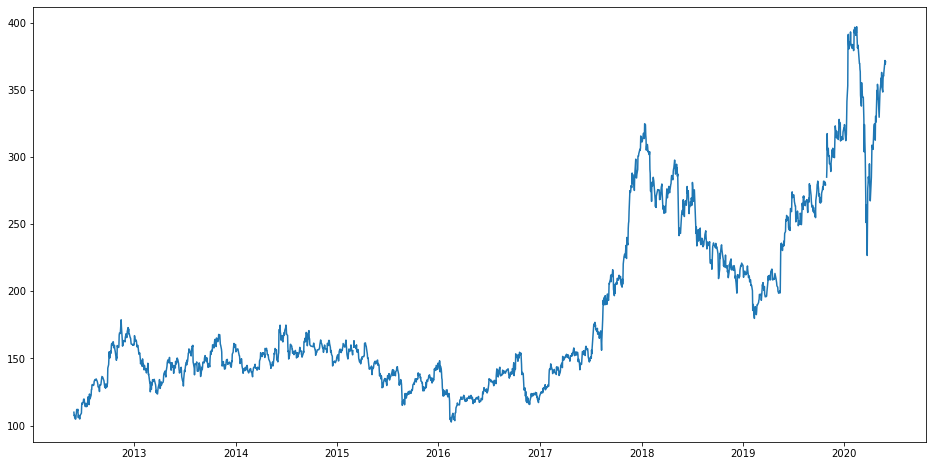

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

# Linear Regression

In [6]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [7]:
new_data.head()

,Date,Close
0,2012-05-29 00:00:00,109.9
1,2012-05-30 00:00:00,107.4
2,2012-05-31 00:00:00,107.8
3,2012-06-01 00:00:00,105.55
4,2012-06-04 00:00:00,104.7


In [9]:
new_data['Dayofweek']=new_data['Date'].dt.dayofweek

In [10]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
new_data.set_index('Date', inplace=True)
new_data.head()

,Close,mon_fri,Dayofweek
Date,,,
2012-05-29,109.9,0,1
2012-05-30,107.4,0,2
2012-05-31,107.8,0,3
2012-06-01,105.55,1,4
2012-06-04,104.7,1,0


In [36]:
# new_data['Date'] = pd.to_datetime(new_data.Date)

In [39]:
# new_data['Date'] = new_data['Date'].dt.strftime('%m/%d/%Y')

In [21]:
new_data.fillna(0)

,Close,mon_fri,Dayofweek
Date,,,
2012-05-29,109.900002,0,1
2012-05-30,107.400002,0,2
2012-05-31,107.800003,0,3
2012-06-01,105.550003,1,4
2012-06-04,104.699997,1,0
...,...,...,...
2020-05-21,360.100006,0,3
2020-05-22,362.950012,1,4
2020-05-26,371.750000,0,1


In [22]:
#split into train and validation
train = new_data[:1600]
valid = new_data[1600:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

ValueError: Input contains NaN

In [24]:
train

,Close,mon_fri,Dayofweek
Date,,,
2012-05-29,109.9,0,1
2012-05-30,107.4,0,2
2012-05-31,107.8,0,3
2012-06-01,105.55,1,4
2012-06-04,104.7,1,0
...,...,...,...
2018-11-14,217.95,0,2
2018-11-15,221.4,0,3
2018-11-16,222,1,4


### Long Short Term Memory (LSTM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing required libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [3]:
#read the file
df = pd.read_csv('TATAGLOBAL.BO.csv')

In [4]:
print('Rows and Columns =',df.shape)
print('    ')
print(df.head(3))

Rows and Columns = (1969, 7)
    
         Date        Open        High         Low       Close  Adj Close  \
0  2012-05-29  112.599998  114.400002  109.150002  109.900002  96.493225   
1  2012-05-30  109.849998  110.550003  107.000000  107.400002  94.298195   
2  2012-05-31  106.500000  109.199997  106.500000  107.800003  94.649391   

     Volume  
0  225822.0  
1  115051.0  
2  134958.0  


In [5]:
df=df.dropna()

In [6]:
# # Creating dataframe

# data= df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])

# # 1st Method of creating DataFrame using for loop

# for i in range(0,len(data)):
    
#     new_data['Date'][i]= data['Date'][i]
#     new_data['Close'][i]= data['Close'][i]
    
    
# # 2nd Method of creating DataFrame using for loop

# # Creating dataframe

data= df.sort_index(ascending=True, axis=0)

Date=[]
Close=[]

for i, j in data.iterrows():

    Date.append(j['Date'])
    Close.append(j['Close'])
    
new_data = pd.DataFrame(data= zip(Date, Close), index=range(0,len(df)), columns=['Date','Close'])   

In [7]:
new_data

,Date,Close
0,2012-05-29,109.900002
1,2012-05-30,107.400002
2,2012-05-31,107.800003
3,2012-06-01,105.550003
4,2012-06-04,104.699997
...,...,...
1959,2020-05-21,360.100006
1960,2020-05-22,362.950012
1961,2020-05-26,371.750000
1962,2020-05-27,368.899994


In [8]:
# Setting index

new_data.index= new_data.Date
new_data.drop('Date', axis=1, inplace=True)
new_data

,Close
Date,
2012-05-29,109.900002
2012-05-30,107.400002
2012-05-31,107.800003
2012-06-01,105.550003
2012-06-04,104.699997
...,...
2020-05-21,360.100006
2020-05-22,362.950012
2020-05-26,371.750000


In [9]:
# Creating train and test sets

dataset= new_data.values

train= dataset[0:987,:]
valid= dataset[987:,:]



In [10]:
# Scaling the dataset

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

In [11]:
# Converting dataset into x_train and y_train

x_train, y_train= [],[]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train= np.reshape( x_train, (x_train.shape[0], x_train.shape[1],1))

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [13]:
# # create and fit the LSTM model

model= Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


# ##--------2nd Model-----------------------------------

# model=Sequential()

# model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=60,activation='relu',return_sequences=True))
# model.add(Dropout(0.3))

# model.add(LSTM(units=80,activation='relu',return_sequences=True))
# model.add(Dropout(0.4))

# model.add(LSTM(units=120,activation='relu',return_sequences=True))
# model.add(Dropout(0.5))

# model.add(Dense(units=1))


# model.compile(optimizer='adam',loss='mean_squared_error')

# model.fit(x_train, y_train, epochs=10, batch_size=32)


927/927 - 31s - loss: 5.9947e-04


In [14]:
# predicting 246 values, using past 60 from the train data

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs = inputs.reshape(-1,1)
inputs= scaler.transform(inputs)

In [15]:
inputs

array([[0.03584779],
       [0.04332314],
       [0.0482501 ],
       ...,
       [0.914543  ],
       [0.90485899],
       [0.91148492]])

In [16]:
x_test=[]

for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
    
x_test= np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [17]:
x_test.shape

(977, 60, 1)

In [18]:
closing_price= model.predict(x_test)
closing_price= scaler.inverse_transform(closing_price)

In [19]:
closing_price

array([[122.44359 ],
       [122.62343 ],
       [122.78817 ],
       [123.529945],
       [124.546906],
       [125.403046],
       [126.595795],
       [127.600685],
       [128.45294 ],
       [128.96382 ],
       [129.18147 ],
       [129.24318 ],
       [129.12003 ],
       [129.1387  ],
       [129.15012 ],
       [128.87656 ],
       [128.69652 ],
       [128.80885 ],
       [129.28807 ],
       [130.02881 ],
       [131.28601 ],
       [132.54608 ],
       [133.60179 ],
       [134.4515  ],
       [134.86183 ],
       [135.0507  ],
       [135.04741 ],
       [134.85504 ],
       [134.62968 ],
       [134.43404 ],
       [133.92476 ],
       [133.37187 ],
       [133.30527 ],
       [133.26912 ],
       [133.25372 ],
       [133.4692  ],
       [133.49916 ],
       [134.1728  ],
       [135.41026 ],
       [137.04341 ],
       [138.55766 ],
       [139.4686  ],
       [139.61607 ],
       [139.59827 ],
       [139.58318 ],
       [140.03413 ],
       [140.72142 ],
       [140.7

In [20]:
# Result

rms = np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

22.648823225849792

<ipython-input-21-38a6ad5232e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= closing_price
No handles with labels found to put in legend.


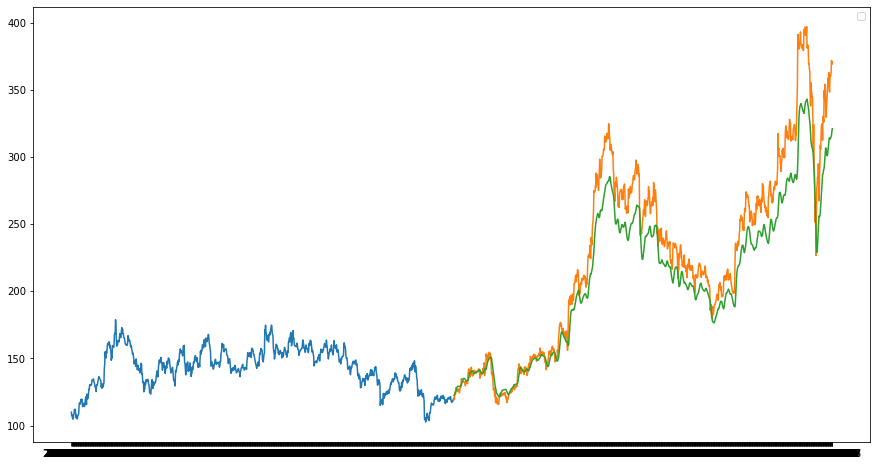

In [21]:
# For plotting

train = new_data[:987]
valid= new_data[987:]

valid['Predictions']= closing_price

plt.figure(figsize=(15,8))
plt.plot(train['Close'])
plt.plot( valid[['Close','Predictions']])
plt.legend()
plt.show()


In [23]:
# Now Plotting in plotly library

In [24]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime


In [32]:
train1=train.reset_index()

In [39]:
train1['Date']=pd.to_datetime(train1['Date'])

In [47]:
# train1['Date'].head(4)
train1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [49]:
train1.head(3)

,Date,Close
0,2012-05-29,109.900002
1,2012-05-30,107.400002
2,2012-05-31,107.800003


In [58]:
valid1=valid.reset_index()

In [59]:
valid1['Date']=pd.to_datetime(valid1['Date'])

In [61]:
valid1.dtypes

Date           datetime64[ns]
Close                 float64
Predictions           float32
dtype: object

In [81]:

fig = go.Figure(data=[go.Scatter(x=train1['Date'],
                                 y=train1['Close'],
                                 line_color ='#4033FF')]
                )

fig.add_trace(
    go.Scatter(
        x=valid1['Date'],
        y=valid1['Predictions'],
        line =dict(color= '#FF5633'),
        name= 'test'
    )
)

fig.add_trace(
    go.Scatter(
        x=valid1['Date'],
        y=valid1['Close'],
        line =dict(color= '#33FF50'),
        name= 'Predictions'
    )
)
fig.update_layout(xaxis_rangeslider_visible=False, template='plotly_dark')
fig.update_layout(yaxis_title ="Stock prices", xaxis_title="Date", title='Apple stocks')
fig.update_yaxes(type="log")
fig.show()


# Google stock price prediction using- RNN (Kaggle)(100% working)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [4]:
dataset_train = pd.read_csv("trainset_RNN.csv")

In [5]:

dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [22]:
trainset = dataset_train.iloc[:,1:2].values   # we are taking only 'Open' dataset

In [23]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [25]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [26]:
x_train = []
y_train = []

In [27]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [33]:
x_train.shape, y_train.shape

((1199, 60, 1), (1199,))

In [34]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [36]:
regressor = Sequential()

regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')




In [37]:
regressor.fit(x_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0399
Epoch 2/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 3/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 4/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 5/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 6/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 7/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 8/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 9/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 10/10
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0030


In [47]:
dataset_test =pd.read_csv("testset_RNN.csv")
dataset_test.shape

(125, 7)

In [48]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [49]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [50]:
x=[len(dataset_total) - len(dataset_test)-60]
x

[1199]

In [51]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values  # 1199
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [53]:
inputs.shape

(185,)

In [54]:
inputs = inputs.reshape(-1,1)

In [55]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [56]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [58]:
inputs

array([[0.83491622],
       [0.85037519],
       [0.86871629],
       [0.86871629],
       [0.86005593],
       [0.87899009],
       [0.88526466],
       [0.88540253],
       [0.88290649],
       [0.88494751],
       [0.87699047],
       [0.88173435],
       [0.88184469],
       [0.85492597],
       [0.85267815],
       [0.86871629],
       [0.90897021],
       [0.91560335],
       [0.91728573],
       [0.92003007],
       [0.92630465],
       [0.92678727],
       [0.93627502],
       [0.93390312],
       [0.93838498],
       [0.94317017],
       [0.93278603],
       [0.9285938 ],
       [0.92744927],
       [0.92278813],
       [0.92735273],
       [0.94319778],
       [0.9242361 ],
       [0.92844213],
       [0.94456301],
       [0.94576276],
       [0.95145817],
       [0.9722677 ],
       [0.95515404],
       [0.92714584],
       [0.91808559],
       [0.91375541],
       [0.89069805],
       [0.89836546],
       [0.92447051],
       [0.94799678],
       [0.94525252],
       [0.950

In [59]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
    

In [60]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [61]:
print(x_test)

[[0.83491622 0.85037519 0.86871629 ... 0.97543954 0.9674549  0.96072522]
 [0.85037519 0.86871629 0.86871629 ... 0.9674549  0.96072522 0.96295924]
 [0.86871629 0.86871629 0.86005593 ... 0.96072522 0.96295924 0.9849825 ]
 ...
 [0.9154792  0.88720906 0.95329222 ... 1.11575598 1.09432578 1.07281292]
 [0.88720906 0.95329222 0.92387754 ... 1.09432578 1.07281292 1.06362853]
 [0.95329222 0.92387754 0.91946462 ... 1.07281292 1.06362853 1.03708217]]


In [24]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [25]:
predicted_price = regressor.predict(x_test)

In [26]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1052.3893],
       [1050.9637],
       [1053.784 ],
       [1063.1654],
       [1075.1764],
       [1086.6235],
       [1095.7795],
       [1098.8328],
       [1099.2588],
       [1097.9307],
       [1102.0408],
       [1107.8285],
       [1113.8839],
       [1118.6569],
       [1122.6954],
       [1129.8973],
       [1140.9324],
       [1150.4792],
       [1156.9171],
       [1160.3785],
       [1160.0751],
       [1158.7135],
       [1156.3195],
       [1146.8363],
       [1130.0375],
       [1102.3628],
       [1085.2374],
       [1076.0745],
       [1066.4015],
       [1063.1658],
       [1064.1805],
       [1067.3131],
       [1075.5974],
       [1086.0371],
       [1094.3853],
       [1101.3834],
       [1107.2571],
       [1110.0084],
       [1112.8339],
       [1117.7722],
       [1119.3715],
       [1115.5297],
       [1099.621 ],
       [1084.8545],
       [1080.637 ],
       [1082.8643],
       [1092.671 ],
       [1108.0968],
       [1127.5631],
       [1144.8431],


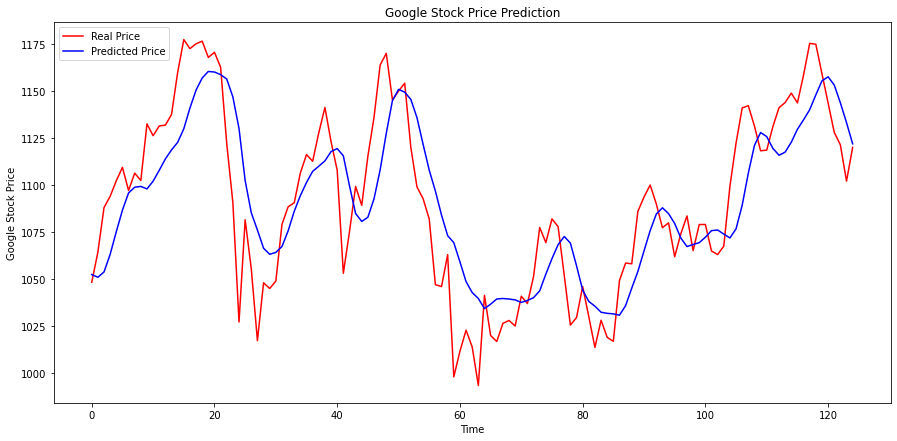

In [28]:
plt.figure(figsize=(15,7))
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()